Лабораторна робота 5

Тема: Регресійний аналіз

Створення набору даних за допомогою DatasetGenerator.


In [1]:
import numpy as np
import pandas as pd

n_samples = 1000
n_features = 5

#Генеруємо випадкові дані для ознак
X = np.random.rand(n_samples, n_features)

#Генеруємо випадкові мітки (0 або 1 для класифікації)
y = np.random.randint(2, size=n_samples)

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])
df['Target'] = y

df.to_csv('generated_dataset.csv', index=False)
print("Згенерований набір даних збережено у файл 'generated_dataset.csv'.")

Згенерований набір даних збережено у файл 'generated_dataset.csv'.


Генерування набору даних для класифікації:

In [3]:
import numpy as np
import csv

n = 100 


x = np.random.rand(n) * 10  

true_slope = 3.7
true_intercept = 2.5

noise = np.random.randn(n) * 0.5  # шум з нульовим середнім та стандартним відхиленням 0.5
y = true_slope * x + true_intercept + noise

#Записуємо дані у CSV файл
with open('/Users/alexeipavlenko/Documents/Data_Science-1/Lab5/generated_dataset.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['x', 'y'])  #заголовки стовпців
    for i in range(n):
        writer.writerow([x[i], y[i]])

print("Набір даних успішно згенеровано та збережено у файл 'generated_dataset.csv'.")

Набір даних успішно згенеровано та збережено у файл 'generated_dataset.csv'.


Моделювання для власного набору даних

Mean Squared Error: 0.16088175256306386
R² Score: 0.9984830719969476


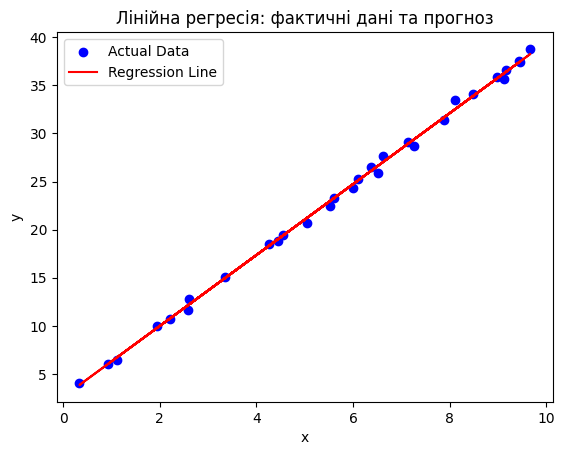

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('/Users/alexeipavlenko/Documents/Data_Science-1/Lab5/generated_dataset.csv')

#Поділ на вхідні змінні (X) та цільову змінну (y)
X = data['x'].values.reshape(-1, 1)  # reshape для sklearn
y = data['y'].values

#Поділ даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Створення та тренування моделі лінійної регресії
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Оцінка якості моделі
mse = mean_squared_error(y_test, y_pred)  #Середньоквадратична помилка
r2 = r2_score(y_test, y_pred)  #Коефіцієнт детермінації R²

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Візуалізація результатів
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Лінійна регресія: фактичні дані та прогноз')
plt.legend()
plt.show()

Завантаження даних:

In [5]:
import pandas as pd
file_path = '/Users/alexeipavlenko/Documents/Data_Science-1/Lab5/drug200.csv'
data = pd.read_csv(file_path)

print(data.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


Моделювання даних:

Mean Squared Error (MSE): 63.0703024017219
R² Score: -0.008583466419049168


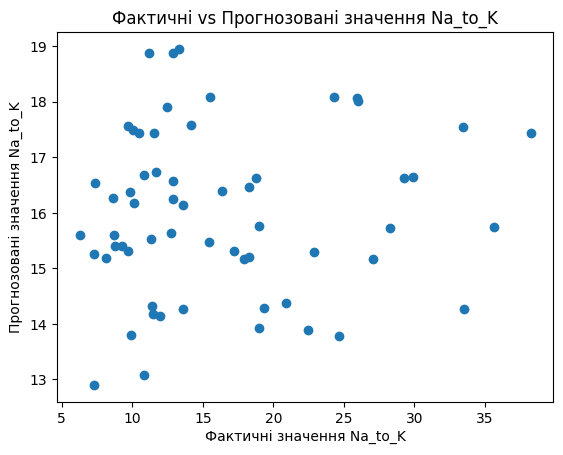

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

file_path = '/Users/alexeipavlenko/Documents/Data_Science-1/Lab5/drug200.csv'
data = pd.read_csv(file_path)

le_sex = LabelEncoder()
le_bp = LabelEncoder()
le_cholesterol = LabelEncoder()

data['Sex'] = le_sex.fit_transform(data['Sex'])
data['BP'] = le_bp.fit_transform(data['BP'])
data['Cholesterol'] = le_cholesterol.fit_transform(data['Cholesterol'])

#Вибір незалежних змінних (Age, Sex, BP, Cholesterol) і залежної змінної (Na_to_K)
X = data[['Age', 'Sex', 'BP', 'Cholesterol']]
y = data['Na_to_K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Фактичні значення Na_to_K")
plt.ylabel("Прогнозовані значення Na_to_K")
plt.title("Фактичні vs Прогнозовані значення Na_to_K")
plt.show()